In [1]:
import pandas as pd
import numpy as np

# Import the kmeans algorithm
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import parallel_coordinates
import seaborn as sns

from os import path, getcwd, chdir, walk

#pathToResults = f"{getcwd()}\\"

#fileName = r'pure_K-MeansClustered_DS_1.csv'

original_data = pd.read_csv('D:\EVTRACKTRACK.csv')

In [2]:
original_data.head(3)

,_id,cursor,timestamp,xpos,ypos,key,event,user,session_id
0,5e4a50654d1e4ccaca5d77d7,0,35:44.5,343,65,0,mousemove,Alluserspreauth,366758616
1,5e4a50654d1e4ccaca5d77d8,0,35:44.8,1010,436,0,mousemove,Alluserspreauth,366758616
2,5e4a50654d1e4ccaca5d77d9,0,35:45.0,894,628,0,mouseout,Alluserspreauth,366758616


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142691 entries, 0 to 142690
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   _id         142691 non-null  object
 1   cursor      142691 non-null  int64 
 2   timestamp   142691 non-null  object
 3   xpos        142691 non-null  int64 
 4   ypos        142691 non-null  int64 
 5   key         142691 non-null  int64 
 6   event       142691 non-null  object
 7   user        142691 non-null  object
 8   session_id  142691 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 9.8+ MB


In [4]:
original_data.drop_duplicates(inplace=True)

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142691 entries, 0 to 142690
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   _id         142691 non-null  object
 1   cursor      142691 non-null  int64 
 2   timestamp   142691 non-null  object
 3   xpos        142691 non-null  int64 
 4   ypos        142691 non-null  int64 
 5   key         142691 non-null  int64 
 6   event       142691 non-null  object
 7   user        142691 non-null  object
 8   session_id  142691 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 10.9+ MB


In [6]:
original_data.drop(['cursor'], axis = 1, inplace=True)

In [7]:
print(len(original_data['key'].unique()))
print(len(original_data['event'].unique()))
print(len(original_data['user'].unique()))
print(len(original_data['session_id'].unique()))

125
8
12
195


In [8]:
original_data['timestamp'] = pd.to_datetime(original_data['timestamp'], format='%M:%S.%f')

In [9]:
original_data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            142681, 142682, 142683, 142684, 142685, 142686, 142687, 142688,
            142689, 142690],
           dtype='int64', length=142691)

In [10]:
def find_cat(original_data):
    for name in original_data.columns:
        s = ''
        s += name
        if (type(original_data[name][0]) == str):
            s += ' строка,'
        if (original_data[name].nunique()<=3):
            s += ' мало уникальных'
        if (s!=name):
            print (s)
            
find_cat(original_data)

_id строка,
event строка,
user строка,


In [11]:
import pandas
pandas.unique(original_data['event'])

array(['mousemove', 'mouseout', 'keydown', 'keyup', 'mouseover',
       'mousedown', 'mouseup', 'mousewheel'], dtype=object)

In [12]:
dct = {'mousemove': 0, 'mouseout': 1, 'keyup': 2, 'keydown': 3, 'mouseover': 4, 'keydown': 5, 'mousedown':6, 'mouseup':7, 'mousewheel':8}
original_data['event_le'] = original_data['event'].map(dct)
original_data.head(15)

,_id,timestamp,xpos,ypos,key,event,user,session_id,event_le
0,5e4a50654d1e4ccaca5d77d7,1900-01-01 00:35:44.500,343,65,0,mousemove,Alluserspreauth,366758616,0
1,5e4a50654d1e4ccaca5d77d8,1900-01-01 00:35:44.800,1010,436,0,mousemove,Alluserspreauth,366758616,0
2,5e4a50654d1e4ccaca5d77d9,1900-01-01 00:35:45.000,894,628,0,mouseout,Alluserspreauth,366758616,1
3,5e4a50654d1e4ccaca5d77da,1900-01-01 00:35:45.200,884,645,0,mousemove,Alluserspreauth,366758616,0
4,5e4a50654d1e4ccaca5d77db,1900-01-01 00:35:45.400,879,645,0,mousemove,Alluserspreauth,366758616,0
5,5e4a50654d1e4ccaca5d77dd,1900-01-01 00:35:45.900,879,630,0,mousemove,Alluserspreauth,366758616,0
6,5e4a50654d1e4ccaca5d77de,1900-01-01 00:35:46.200,878,353,0,mousemove,Alluserspreauth,366758616,0
7,5e4a50654d1e4ccaca5d77df,1900-01-01 00:35:46.400,878,401,0,mousemove,Alluserspreauth,366758616,0
8,5e4a50654d1e4ccaca5d77e1,1900-01-01 00:35:47.000,0,0,71,keydown,Alluserspreauth,366758616,5
9,5e4a50654d1e4ccaca5d77e2,1900-01-01 00:35:47.100,0,0,30,keydown,Alluserspreauth,366758616,5


In [13]:
original_data.drop(['_id'], axis = 1, inplace=True)
#original_data.drop(['event'], axis = 1, inplace=True)
#original_data.drop(['user'], axis = 1, inplace=True)
original_data.head()

,timestamp,xpos,ypos,key,event,user,session_id,event_le
0,1900-01-01 00:35:44.500,343,65,0,mousemove,Alluserspreauth,366758616,0
1,1900-01-01 00:35:44.800,1010,436,0,mousemove,Alluserspreauth,366758616,0
2,1900-01-01 00:35:45.000,894,628,0,mouseout,Alluserspreauth,366758616,1
3,1900-01-01 00:35:45.200,884,645,0,mousemove,Alluserspreauth,366758616,0
4,1900-01-01 00:35:45.400,879,645,0,mousemove,Alluserspreauth,366758616,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(original_data.event_le.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['event=' + str(i) for i in range(new_ohe_features.shape[1])])
data = pd.concat([original_data, tmp], axis=1)
data

,timestamp,xpos,ypos,key,event,user,session_id,event_le,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7
0,1900-01-01 00:35:44.500,343,65,0,mousemove,Alluserspreauth,366758616,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-01-01 00:35:44.800,1010,436,0,mousemove,Alluserspreauth,366758616,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-01-01 00:35:45.000,894,628,0,mouseout,Alluserspreauth,366758616,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-01-01 00:35:45.200,884,645,0,mousemove,Alluserspreauth,366758616,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-01-01 00:35:45.400,879,645,0,mousemove,Alluserspreauth,366758616,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142686,1900-01-01 00:05:42.200,503,287,0,mouseout,User1,366981514,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142687,1900-01-01 00:05:42.400,446,172,0,mouseout,User1,366981514,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142688,1900-01-01 00:05:42.600,440,156,0,mousemove,User1,366981514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142689,1900-01-01 00:05:46.200,440,156,0,mousemove,User1,366981514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data.drop(['event_le'], axis = 1, inplace=True)
#original_data.drop(['event'], axis = 1, inplace=True)
#original_data.drop(['user'], axis = 1, inplace=True)
data.head()

,timestamp,xpos,ypos,key,event,user,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7
0,1900-01-01 00:35:44.500,343,65,0,mousemove,Alluserspreauth,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-01-01 00:35:44.800,1010,436,0,mousemove,Alluserspreauth,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-01-01 00:35:45.000,894,628,0,mouseout,Alluserspreauth,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-01-01 00:35:45.200,884,645,0,mousemove,Alluserspreauth,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-01-01 00:35:45.400,879,645,0,mousemove,Alluserspreauth,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data_gr = data.groupby(['user','session_id','xpos', 'ypos'])['session_id'].value_counts()

<AxesSubplot:>

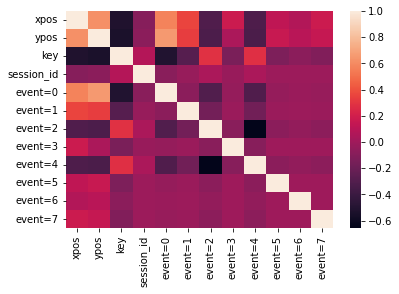

In [17]:
#sns.heatmap(data.corr(), annot=True)
sns.heatmap(data.corr())

C:\Users\I00646~1\AppData\Local\Temp/ipykernel_20768/1072616888.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


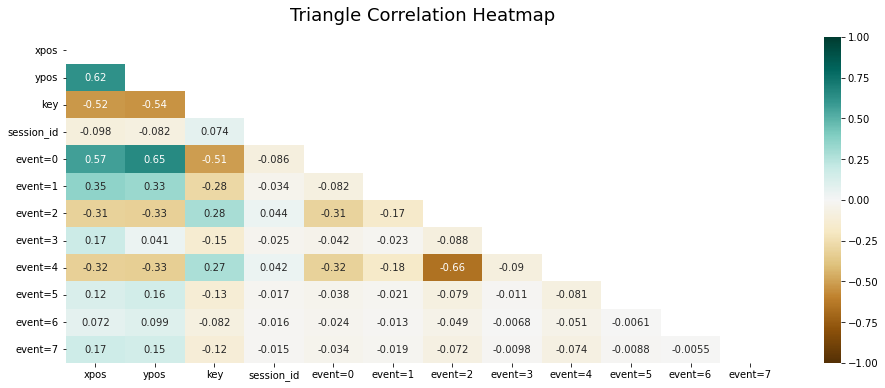

In [18]:
plt.figure(figsize=(16, 6)) 

# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [19]:
dct2 = {'Alluserspreauth': 0, 'User1': 1, 'User2': 2, 'User3': 3, 'User4': 4, 'User5': 5, 'User6':6, 'User7':7, 'User8':8, 'User9':9, 'User10':10, 'User11':11}
data['cluster'] = original_data['user'].map(dct2)
data.drop(['user'], axis = 1, inplace=True)
data.drop(['event'], axis = 1, inplace=True)

data.head()

,timestamp,xpos,ypos,key,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7,cluster
0,1900-01-01 00:35:44.500,343,65,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1900-01-01 00:35:44.800,1010,436,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1900-01-01 00:35:45.000,894,628,0,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1900-01-01 00:35:45.200,884,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1900-01-01 00:35:45.400,879,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


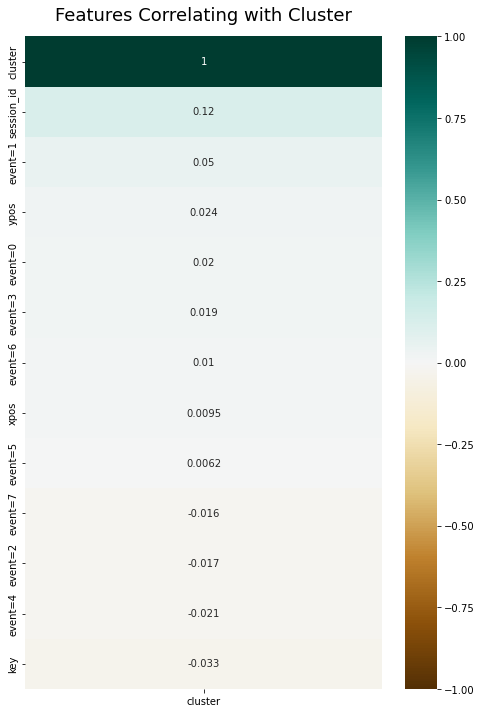

In [20]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['cluster']].sort_values(by='cluster', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Cluster', fontdict={'fontsize':18}, pad=16);

In [21]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

In [22]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 18
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

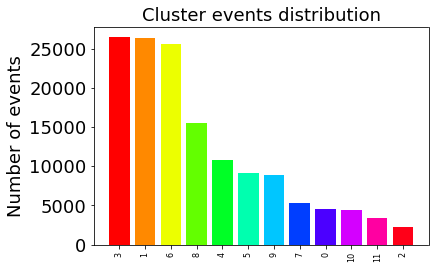

In [23]:
cluster_count = pd.value_counts(data['cluster'].values, sort=True)
cluster_count_keys,cluster_count_values = dict_sort(dict(cluster_count))    
TOP_CLUSTER = len(cluster_count_keys)
plt.title('Cluster events distribution', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_CLUSTER), cluster_count_values, color=getColors(TOP_CLUSTER))
plt.xticks(np.arange(TOP_CLUSTER), cluster_count_keys, rotation=90, fontsize=8)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Number of events', fontsize=PLOT_LABEL_FONT_SIZE)
#plt.yscale('log')
plt.show()

<AxesSubplot:>

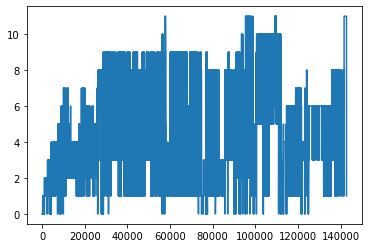

In [24]:
data['cluster'].plot()

In [25]:
data_analysis = data[['cluster','session_id', 'xpos', 'ypos']]

In [26]:
data['timestamp'].dtype

dtype('<M8[ns]')

In [27]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%M:%S.%f')

In [28]:
data['timestamp'].dtype
data.head()

,timestamp,xpos,ypos,key,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7,cluster
0,1900-01-01 00:35:44.500,343,65,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1900-01-01 00:35:44.800,1010,436,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1900-01-01 00:35:45.000,894,628,0,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1900-01-01 00:35:45.200,884,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1900-01-01 00:35:45.400,879,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
data['diff_time'] = data.groupby('session_id')['timestamp'].diff(1)
data['user'] = original_data['user']

In [30]:
data.head()

,timestamp,xpos,ypos,key,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7,cluster,diff_time,user
0,1900-01-01 00:35:44.500,343,65,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaT,Alluserspreauth
1,1900-01-01 00:35:44.800,1010,436,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0 days 00:00:00.300000,Alluserspreauth
2,1900-01-01 00:35:45.000,894,628,0,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0 days 00:00:00.200000,Alluserspreauth
3,1900-01-01 00:35:45.200,884,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0 days 00:00:00.200000,Alluserspreauth
4,1900-01-01 00:35:45.400,879,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0 days 00:00:00.200000,Alluserspreauth


In [31]:
data['diff_time'].dtype

dtype('<m8[ns]')

In [32]:
data['diff_time'] = data['diff_time'].dt.total_seconds()/60
#df.time.dt.minute

In [33]:
data['diff_time'].dtype
data.head()

,timestamp,xpos,ypos,key,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7,cluster,diff_time,user
0,1900-01-01 00:35:44.500,343,65,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,Alluserspreauth
1,1900-01-01 00:35:44.800,1010,436,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005000,Alluserspreauth
2,1900-01-01 00:35:45.000,894,628,0,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth
3,1900-01-01 00:35:45.200,884,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth
4,1900-01-01 00:35:45.400,879,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth


In [34]:
data['delta_x'] = data.groupby('session_id')['xpos'].diff(1)
data['delta_y'] = data.groupby('session_id')['ypos'].diff(1)
data['velocity'] = (((data['delta_x'])**2+(data['delta_y'])**2)**0.5)/data['diff_time']
data.head()

,timestamp,xpos,ypos,key,session_id,event=0,event=1,event=2,event=3,event=4,event=5,event=6,event=7,cluster,diff_time,user,delta_x,delta_y,velocity
0,1900-01-01 00:35:44.500,343,65,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,Alluserspreauth,NaN,NaN,NaN
1,1900-01-01 00:35:44.800,1010,436,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005000,Alluserspreauth,667.0,371.0,152647.305905
2,1900-01-01 00:35:45.000,894,628,0,366758616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth,-116.0,192.0,67296.359485
3,1900-01-01 00:35:45.200,884,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth,-10.0,17.0,5916.924877
4,1900-01-01 00:35:45.400,879,645,0,366758616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003333,Alluserspreauth,-5.0,0.0,1500.000000


C:\Users\I00646~1\AppData\Local\Temp/ipykernel_20768/1072616888.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


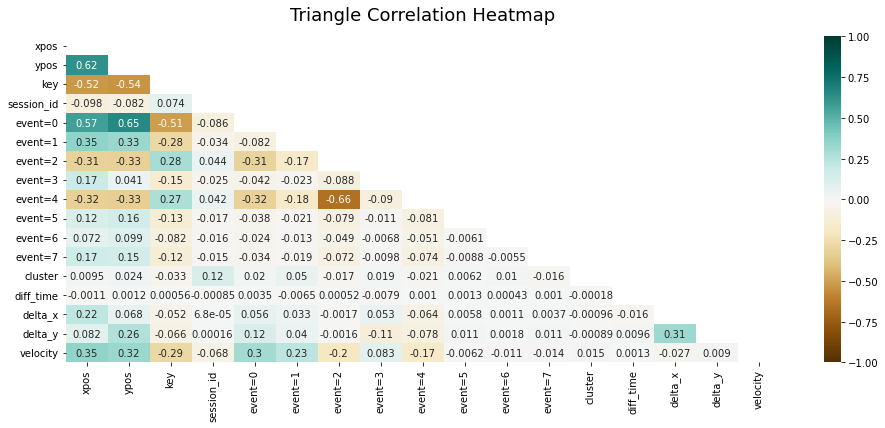

In [35]:
plt.figure(figsize=(16, 6)) 

# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:>

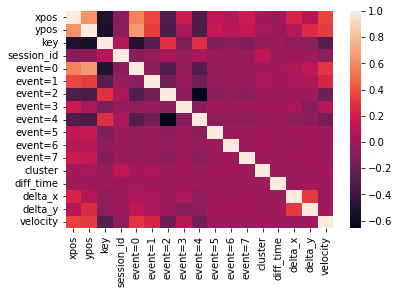

In [36]:
sns.heatmap(data.corr())

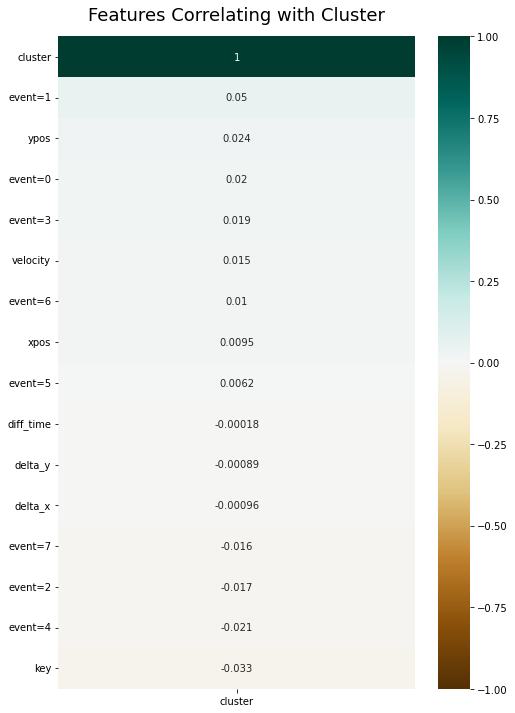

In [37]:
data.drop(['session_id'], axis = 1, inplace=True)


plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['cluster']].sort_values(by='cluster', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Cluster', fontdict={'fontsize':18}, pad=16);

In [38]:
original_data.head()

,timestamp,xpos,ypos,key,event,user,session_id,event_le
0,1900-01-01 00:35:44.500,343,65,0,mousemove,Alluserspreauth,366758616,0
1,1900-01-01 00:35:44.800,1010,436,0,mousemove,Alluserspreauth,366758616,0
2,1900-01-01 00:35:45.000,894,628,0,mouseout,Alluserspreauth,366758616,1
3,1900-01-01 00:35:45.200,884,645,0,mousemove,Alluserspreauth,366758616,0
4,1900-01-01 00:35:45.400,879,645,0,mousemove,Alluserspreauth,366758616,0


In [39]:
Alluserspreauth = original_data.loc[original_data['user'] == 'Alluserspreauth']
Alluserspreauth
pandas.unique(Alluserspreauth['session_id'])

array([366758616, 366758629, 366758800, 366758946, 366759690, 366760691,
       366764188, 366777947, 366778257, 366779772, 366789621, 366802152,
       366802189, 366829233, 366836817, 366847290, 366910108, 366911665,
       366912208, 366912775, 366913008, 366913230, 366913628, 366914623,
       366914947, 366916058, 366916191, 366916598, 366916656, 366916786,
       366916944, 366917158, 366920046, 366922540, 366923206, 366923544,
       366924226, 366924626, 366926620, 366927991, 366928127, 366929672,
       366931488, 366931492, 366931937, 366931957, 366932377, 366932383,
       366980532, 366980542, 366980628, 366980656, 366983955], dtype=int64)

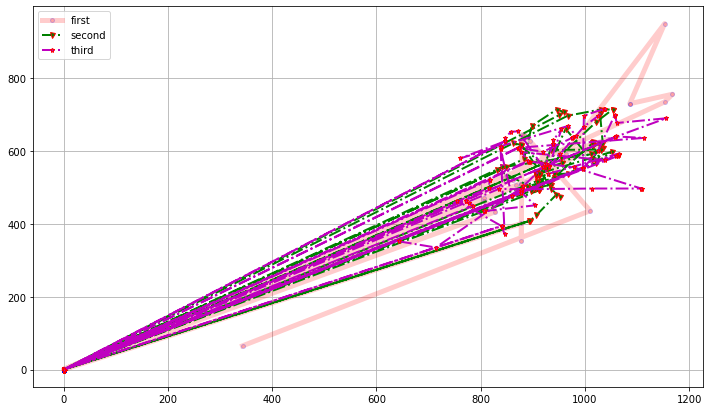

In [40]:
id616 = Alluserspreauth.loc[Alluserspreauth['session_id'] == 366758616]
x=id616['xpos']
y=id616['ypos']
id366758629 = Alluserspreauth.loc[Alluserspreauth['session_id'] == 366758629]
x1=id366758629['xpos']
y1=id366758629['ypos']
id366758800 = Alluserspreauth.loc[Alluserspreauth['session_id'] == 366758800]
x2=id366758800['xpos']
y2=id366758800['ypos']

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-r', alpha=0.2, label="first", lw=5, mec='b', mew=1, ms=4)
plt.plot(x1, y1, 'v-.g', label="second", mec='r', lw=2, mew=1, ms=5)
plt.plot(x2, y2, '*-.m', label="third", mec='r', lw=2, mew=1, ms=5)


plt.legend()
plt.grid(True)

In [41]:
User1 = original_data.loc[original_data['user'] == 'User1']

pandas.unique(User1['session_id'])

array([366758624, 366771570, 366840267, 366841748, 366842028, 366842545,
       366842652, 366842876, 366843244, 366843799, 366847028, 366847308,
       366910115, 366911682, 366920096, 366931489, 366981501, 366981512,
       366981514], dtype=int64)

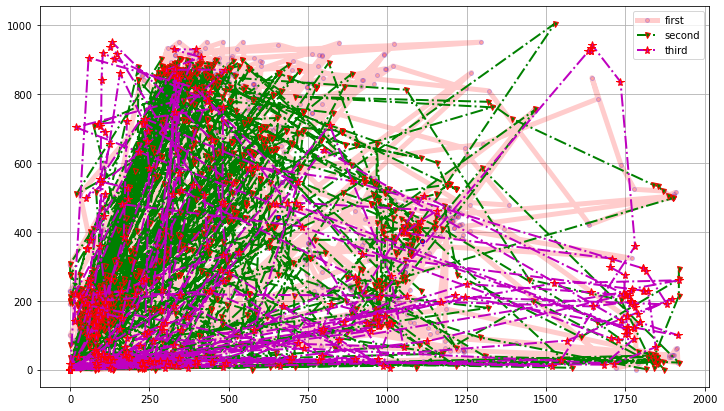

In [42]:
id366758624 = User1.loc[User1['session_id'] == 366758624]
x=id366758624['xpos']
y=id366758624['ypos']
id366771570 = User1.loc[User1['session_id'] == 366771570]
x1=id366771570['xpos']
y1=id366771570['ypos']
id366840267 = User1.loc[User1['session_id'] == 366840267]
x2=id366840267['xpos']
y2=id366840267['ypos']

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-r', alpha=0.2, label="first", lw=5, mec='b', mew=1, ms=4)
plt.plot(x1, y1, 'v-.g', label="second", mec='r', lw=2, mew=1, ms=5)
plt.plot(x2, y2, '*-.m', label="third", mec='r', lw=2, mew=1, ms=8)


plt.legend()
plt.grid(True)